# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [2]:
# Data: order_items.csv
df = pd.read_csv(r"..\data\raw_data\order_items.csv")
display(df.shape)
display(df.columns)
df.head()

(203519, 13)

Index(['APP_NAME', 'RESTAURANT_ID', 'CREATION_TIME_UTC', 'ORDER_ID', 'USER_ID',
       'PRINTED_CARD_NUMBER', 'IS_LOYALTY', 'CURRENCY', 'LINEITEM_ID',
       'ITEM_CATEGORY', 'ITEM_NAME', 'ITEM_PRICE', 'ITEM_QUANTITY'],
      dtype='object')

,APP_NAME,RESTAURANT_ID,CREATION_TIME_UTC,ORDER_ID,USER_ID,PRINTED_CARD_NUMBER,IS_LOYALTY,CURRENCY,LINEITEM_ID,ITEM_CATEGORY,ITEM_NAME,ITEM_PRICE,ITEM_QUANTITY
0,Alltown Fresh,63bc98a7519adc105105a990,2023-03-08T11:03:32.223Z,64086b8463905bf310002079,63ee144950286a8367041911,NaN,False,USD,64086b84d5fbd8718a0717e6,Breakfast,Bacon Egg & Cheese*,5.99,1
1,Alltown Fresh,5f6a6c1537ab46bd38e9df75,2023-05-13T12:45:00.475Z,645f864c1c4b0312f10cfa75,NaN,NaN,False,USD,645f869568ab8e534e099ea7,Breakfast,Breakfast Burrito*,7.99,1
2,Alltown Fresh,5fece84aadb0d51509c36f22,2023-02-03T07:15:28.519Z,63dcb490665d80c6be09a618,5ece77fe902ad501337b23fd,NaN,False,USD,63dcb49b665d80c6be09a657,Breakfast,Bacon Egg & Cheese*,5.99,1
3,Alltown Fresh,5f6a6c1537ab46bd38e9df75,2023-08-17T16:18:02.231Z,64de483a7028adc2520d8cf0,NaN,NaN,False,USD,64de484eb7b035d89d004141,Salads,Greek Salad,11.99,1
4,Alltown Fresh,622107b40ac81503e0369ca6,2023-08-20T16:02:12.518Z,64e23904baef31a741016be9,NaN,NaN,False,USD,64e2395465826c9b650c1c37,Breakfast,Breakfast Burrito*,5.99,1


### Statistics

In [3]:
print(f"There are {df['LINEITEM_ID'].nunique()} \t LineItem_ID in the dataset")
print(f"There are {df['ORDER_ID'].nunique()} \t Order_ID in the dataset")
print(f"There are {df['USER_ID'].nunique()} \t users in the dataset")
print(f"There are {df['ITEM_NAME'].nunique()} \t\t item_names in the dataset")
print(f"There are {df['ITEM_CATEGORY'].nunique()} \t\t item_categories in the dataset")
print(f"There are {df['RESTAURANT_ID'].nunique()} \t\t restaurants in the dataset")
print(f"There are {df['APP_NAME'].nunique()} \t\t applications in the dataset")
print(f"There are {df['CURRENCY'].nunique()} \t\t Currency in the dataset")

There are 203518 	 LineItem_ID in the dataset
There are 131328 	 Order_ID in the dataset
There are 20174 	 users in the dataset
There are 431 		 item_names in the dataset
There are 45 		 item_categories in the dataset
There are 28 		 restaurants in the dataset
There are 3 		 applications in the dataset
There are 1 		 Currency in the dataset


### Histogram plot

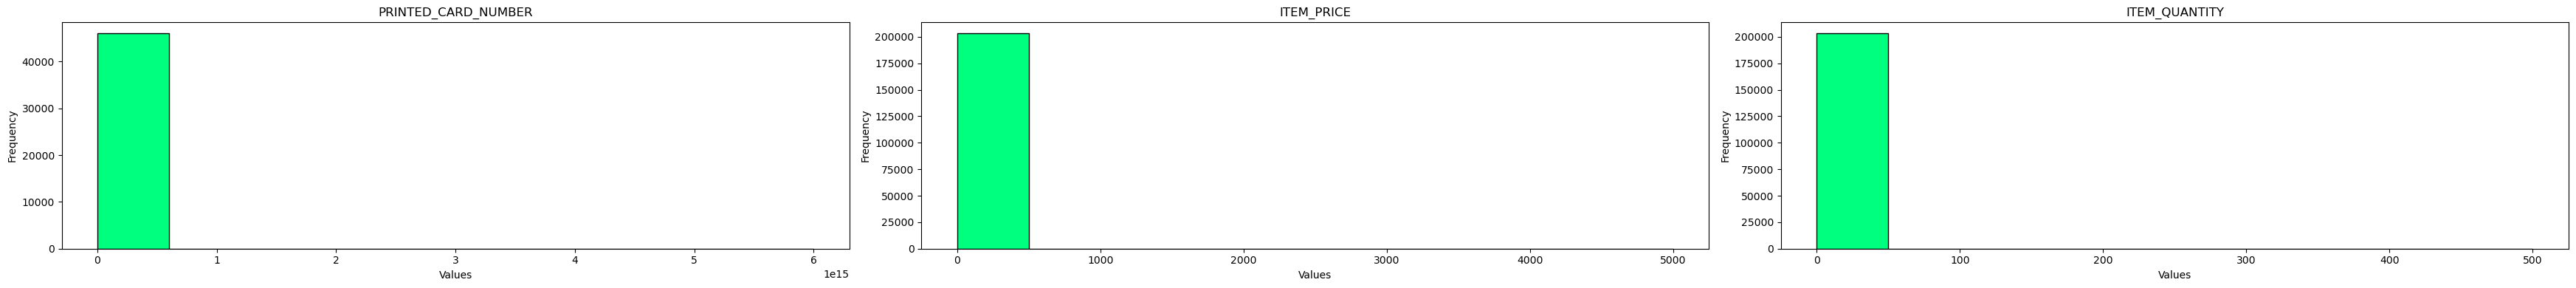

In [4]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(35, n_rows*4))

for ax, col in zip(axes.flatten(), numeric_cols):
    ax.hist(df[col], bins=10, color='springgreen', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

for ax in axes.flatten()[len(numeric_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.savefig('../Reports/project3_columns_order_items.png', dpi=300)
plt.show()

### Duplicates

In [5]:
row_dups = df.duplicated().any()
col_dups = df.columns.duplicated().any()

if not row_dups and not col_dups:
    print("No duplicate rows or columns found")
else:
    if row_dups:
        print("Duplicate rows:")
        print(df[df.duplicated()])

    if col_dups:
        print("Duplicate columns:")
        print(df.columns[df.columns.duplicated()])

No duplicate rows or columns found


### Consider Unique key 

In [6]:
unique_key_dups = df['LINEITEM_ID'].duplicated().any()
unique_key_dups

np.False_

### Missing values

In [7]:
print(f"Is there missing values in the master_dataset?  {df.isna().any().any()}")
display(missing_values_1 := df.isnull().sum())

Is there missing values in the master_dataset?  True


APP_NAME                    0
RESTAURANT_ID               0
CREATION_TIME_UTC           0
ORDER_ID                    0
USER_ID                 17808
PRINTED_CARD_NUMBER    157435
IS_LOYALTY                  0
CURRENCY                    0
LINEITEM_ID                 1
ITEM_CATEGORY               1
ITEM_NAME                   1
ITEM_PRICE                  0
ITEM_QUANTITY               0
dtype: int64

In [8]:
missing_rows = df[df[['LINEITEM_ID', 'ITEM_CATEGORY', 'ITEM_NAME']].isna().any(axis=1)]
display(missing_rows)

,APP_NAME,RESTAURANT_ID,CREATION_TIME_UTC,ORDER_ID,USER_ID,PRINTED_CARD_NUMBER,IS_LOYALTY,CURRENCY,LINEITEM_ID,ITEM_CATEGORY,ITEM_NAME,ITEM_PRICE,ITEM_QUANTITY
16529,Alltown Fresh,5e7e35ed902ad5ac017b242b,2021-12-07T16:23:30.917Z,61af8a82ffd125453e62ae37,609d681462e498b356e72a6d,NaN,False,USD,NaN,NaN,NaN,4.39,0


## Removing the missing value from unique-key

In [9]:
print(f"Rows before cleaning: {len(df)}")
df_clean = df.dropna(subset=['LINEITEM_ID'])
print(f"Rows after cleaning: {len(df_clean)}")
print(f"Number of duplicates removed: {len(df) - len(df_clean)}")

Rows before cleaning: 203519
Rows after cleaning: 203518
Number of duplicates removed: 1


In [10]:
print(f"Is there missing values in the master_dataset?  {df_clean.isna().any().any()}")
display(missing_values_1 := df_clean.isnull().sum())

Is there missing values in the master_dataset?  True


APP_NAME                    0
RESTAURANT_ID               0
CREATION_TIME_UTC           0
ORDER_ID                    0
USER_ID                 17808
PRINTED_CARD_NUMBER    157434
IS_LOYALTY                  0
CURRENCY                    0
LINEITEM_ID                 0
ITEM_CATEGORY               0
ITEM_NAME                   0
ITEM_PRICE                  0
ITEM_QUANTITY               0
dtype: int64

### Outliers

In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns
text_cols = df.select_dtypes(exclude=np.number).columns

print("Number of numeric columns:", len(numeric_cols))
print("Numeric columns:", numeric_cols.tolist())

print("Number of text columns:", len(text_cols))
print("Text columns:", text_cols.tolist())

Number of numeric columns: 3
Numeric columns: ['PRINTED_CARD_NUMBER', 'ITEM_PRICE', 'ITEM_QUANTITY']
Number of text columns: 10
Text columns: ['APP_NAME', 'RESTAURANT_ID', 'CREATION_TIME_UTC', 'ORDER_ID', 'USER_ID', 'IS_LOYALTY', 'CURRENCY', 'LINEITEM_ID', 'ITEM_CATEGORY', 'ITEM_NAME']


In [12]:
display(df[text_cols].nunique())
display(df[text_cols].isna().sum())

APP_NAME                  3
RESTAURANT_ID            28
CREATION_TIME_UTC    131328
ORDER_ID             131328
USER_ID               20174
IS_LOYALTY                2
CURRENCY                  1
LINEITEM_ID          203518
ITEM_CATEGORY            45
ITEM_NAME               431
dtype: int64

APP_NAME                 0
RESTAURANT_ID            0
CREATION_TIME_UTC        0
ORDER_ID                 0
USER_ID              17808
IS_LOYALTY               0
CURRENCY                 0
LINEITEM_ID              1
ITEM_CATEGORY            1
ITEM_NAME                1
dtype: int64

In [13]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (
    (df[numeric_cols] < (Q1 - 1.5 * IQR)) |
    (df[numeric_cols] > (Q3 + 1.5 * IQR))
)

# Number of outliers per column
outliers.sum()

PRINTED_CARD_NUMBER        1
ITEM_PRICE              6942
ITEM_QUANTITY          13651
dtype: int64

### Save Clean data

In [14]:
df_clean.to_csv(r"..\data\clean_data\order_items.csv", index=False)